In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
content = []
paths = ["raw/volkswagen_tiguan.txt", "raw/skoda_karoq.txt", "raw/skoda_octavia.txt"]
for path in paths:
    with open(path, "r") as f:
        content += f.readlines()
        content += ["\n", "\n"]

In [3]:
annonces = []
prevL = ""

annonce_str = ""
for l in content:
    annonce_str += l
    if l == "\n" and prevL == "\n":
        annonces.append(annonce_str)
        annonce_str = ""
    prevL = l

len(annonces)

4365

In [4]:
cleaned = []
sizes = []
for annonce in annonces:
    clean = []
    title = annonce.split("\n")[0]
    if "skoda-karoq" in title or "volkswagen-tiguan" in title or "skoda-octavia":
        for i, el in enumerate([e for e in annonce.split("\n") if e != "" and "," not in e]):
            clean.append(el)
        sizes.append(len(clean))
        if len(clean) > 11:
            print(len(clean), clean)
        cleaned.append(clean)
len(cleaned)

14 ['Votre occasion', 'Votre occasion', 'Profitez en', 'volkswagen-tiguan-ii-2020-auto-82800-km-diesel', 'VOLKSWAGEN TIGUAN II', '2.0 TDI 150 BLACK R-LINE', '2020', 'Auto', '82 800 km', 'Diesel', '28 980 €', 'Offre équitable', 'BEMA LIFE', '94']
12 ['achetez votre véhicule en toute sérénité.', 'volkswagen-tiguan-ii-phase-2-2021-auto-23282-km-hybrides', 'VOLKSWAGEN TIGUAN II phase 2', '1.4 E-HYBRID 245 R-LINE EXCLUSIVE', '2021', 'Auto', '23 282 km', 'Hybrides', '35 980 €', 'Bonne affaire', 'BAUER PARIS SAINT WITZ', '95']
14 ['GCA Days', 'GCA Days', 'Jouez et tentez de gagner une voiture d’occasion !', 'volkswagen-tiguan-ii-phase-2-2021-auto-61886-km-hybrides', 'VOLKSWAGEN TIGUAN II phase 2', '1.4 E-HYBRID 245 R-LINE EXCLUSIVE', '2021', 'Auto', '61 886 km', 'Hybrides', '30 980 €', 'Bonne affaire', 'AUDI BAUER PARIS SAINT-OUEN', '93']
14 ['Votre occasion', 'Votre occasion', 'Profitez en', 'volkswagen-tiguan-ii-phase-2-2021-auto-147212-km-hybrides', 'VOLKSWAGEN TIGUAN II phase 2', '1.4 E-H

4365

In [ ]:
    min(sizes)

max(sizes)

In [11]:
def extract(annonce):
    d = {}
    try:
        d["brand"] = "skoda" if "skoda" in annonce[0] else "volkswagen" if "volkswagen" in annonce[0] else "-"
        d["title"] = annonce[0]
        d["model"] = annonce[1]
        d["type"] = annonce[2]
        engine = annonce[2].split(" ")
        d["engineVolume"] = float(engine[0])
        d["engineType"] = engine[1]
        d["enginePower"] = int(engine[2])
        d["line"] = " ".join(engine[3:]) if len(engine) >=4 else "-"
        d["year"] = int(annonce[3])
        d["gearbox"] = annonce[4]
        d["km"] = int(annonce[5].replace(" ", "").replace("km", ""))
        d["gas"] = annonce[6]
        d["price"] = int(annonce[7].replace(" ", "").replace("€", ""))
        d["label"] = annonce[-3] if "€" not in annonce[-3] else "-"
        d["place"] = annonce[-2]
        d["location"] = annonce[-1]
    except ValueError:
        print(annonce)
    return d

In [13]:
data = [extract(a) for a in cleaned]

df = pd.DataFrame(data)\
    .drop_duplicates() \
    .sort_values(["year", "km"])\
    .reset_index(drop=True)
df.to_csv("./processed/data.csv", index=True, index_label="idx")
df.head()

,brand,title,model,type,engineVolume,engineType,enginePower,line,year,gearbox,km,gas,price,label,place,location
0,volkswagen,volkswagen-tiguan-2007-manual-264000-km-diesel,VOLKSWAGEN TIGUAN,2.0 TDI 140,2.0,TDI,140,-,2007,Manuelle,264000,Diesel,6800,Offre équitable,OCC'AUTO,63
1,volkswagen,volkswagen-tiguan-2008-manual-82000-km-diesel,VOLKSWAGEN TIGUAN,2.0 TDI 140 CONFORTLINE,2.0,TDI,140,CONFORTLINE,2008,Manuelle,82000,Diesel,14990,Offre équitable,KRIS'AUTO,31
2,volkswagen,volkswagen-tiguan-2008-auto-178800-km-diesel,VOLKSWAGEN TIGUAN,2.0 TDI 140 CONFORTLINE,2.0,TDI,140,CONFORTLINE,2008,Auto,178800,Diesel,9900,Offre équitable,ADONIS AUTO,69
3,volkswagen,volkswagen-tiguan-2008-manual-320000-km-diesel,VOLKSWAGEN TIGUAN,2.0 TDI 140 CARAT,2.0,TDI,140,CARAT,2008,Manuelle,320000,Diesel,6490,-,SIMPLICICARMEAUX,77
4,volkswagen,volkswagen-tiguan-2009-auto-50500-km-essence,VOLKSWAGEN TIGUAN,2.0 TSI 200 CONFORTLINE,2.0,TSI,200,CONFORTLINE,2009,Auto,50500,Essence,12200,Bonne affaire,L D L AUTOS,92


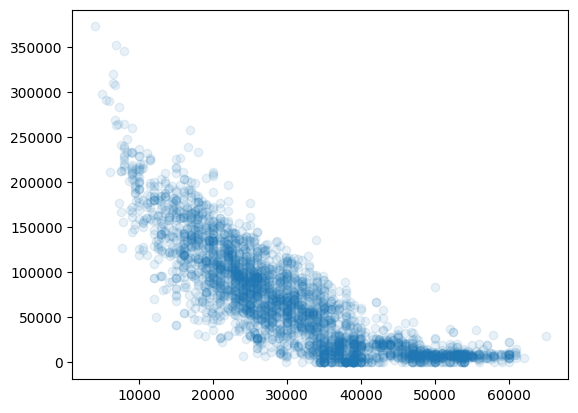

In [14]:
plt.scatter(df["price"].values, df["km"].values, alpha=0.1)
plt.show()